<a href="https://colab.research.google.com/github/Vineeshchowdary6826/NLP-Excel-R/blob/master/01_02_25_and_3_02_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Reviews.csv',nrows=1000)
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      1000 non-null   int64 
 1   ProductId               1000 non-null   object
 2   UserId                  1000 non-null   object
 3   ProfileName             1000 non-null   object
 4   HelpfulnessNumerator    1000 non-null   int64 
 5   HelpfulnessDenominator  1000 non-null   int64 
 6   Score                   1000 non-null   int64 
 7   Time                    1000 non-null   int64 
 8   Summary                 1000 non-null   object
 9   Text                    1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [3]:
df.Summary.head()

,Summary
0,Good Quality Dog Food
1,Not as Advertised
2,"""Delight"" says it all"
3,Cough Medicine
4,Great taffy


In [4]:
df.Text.head()

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...


In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
from textblob import TextBlob
from textblob import Word


In [7]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from textblob import TextBlob, Word
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (Replace with your actual dataset)
# Assuming your original dataset has a 'Score' column
df = pd.DataFrame({'Text': ["This is an example sentence!!!", "Text preprocessing is useful in NLP.", "I amm leaarning machne learning!"],
                   'Score': [5, 4, 3]})  # Added a 'Score' column

# Convert text to lowercase
df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Fix: Use regex=True to avoid warning in str.replace
df['Text'] = df['Text'].str.replace('[^\w\s]', '', regex=True)

# Remove stopwords
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# Spelling correction
df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))

# Lemmatization
df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

# Display first few rows
print(df.Text.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                 example sentence
1    text preprocessing useful nap
2     am learning machine learning
Name: Text, dtype: object


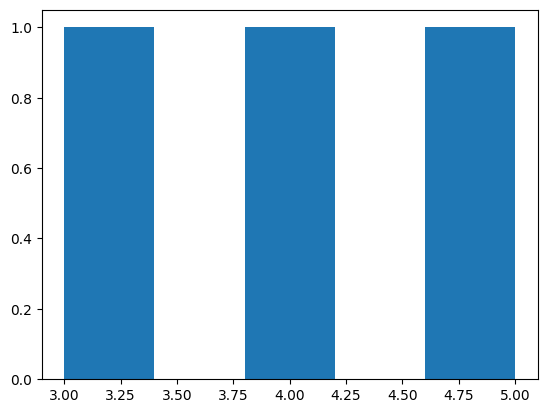

AttributeError: 'DataFrame' object has no attribute 'Id'

In [22]:
reviews = df
reviews.dropna(inplace=True)
reviews.Score.hist(bins=5, grid=False) # Now 'Score' column exists
plt.show()
print(reviews.groupby('Score').count().Id) # Assuming you have an 'Id' column, otherwise adjust accordingly

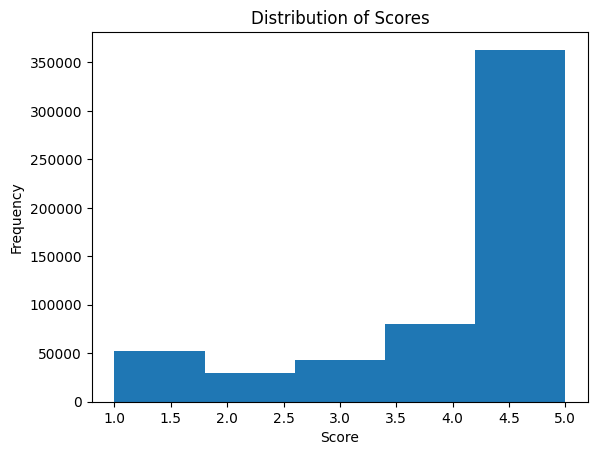

Score
1     52264
2     29743
3     42638
4     80654
5    363102
Name: Id, dtype: int64


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
reviews_sample = pd.read_csv("/content/Reviews.csv")

# Remove missing values
reviews_sample.dropna(inplace=True)

# Plot histogram of 'Score'
reviews_sample["Score"].hist(bins=5, grid=False)
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribution of Scores")
plt.show()

# Group by 'Score' and count occurrences of 'Id'
print(reviews_sample.groupby("Score")["Id"].count())


03-02-2025


In [33]:
negative_reviews = reviews_sample[reviews_sample['Score'].isin([1,2])]
positive_reviews = reviews_sample[reviews_sample['Score'].isin([4,5])]

negative_reviews_str = negative_reviews.Summary.str.cat()
positive_reviews_str = positive_reviews.Summary.str.cat()




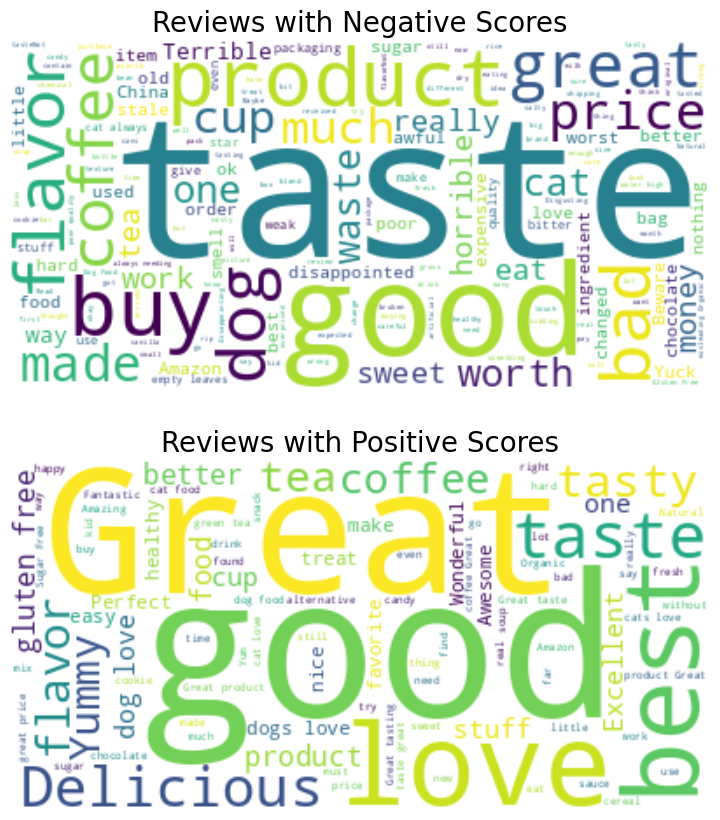

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='white').generate(positive_reviews_str)

# Plot
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative, interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores', fontsize=20)

ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores', fontsize=20)

plt.show()

In [38]:
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.1 MB/s eta 0:00:00


In [ ]:
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

cp = sns.color_palette()
analyzer = SentimentIntensityAnalyzer()
#
for row in df ['Text']:
    vs = analyzer.polarity_scores(row)
    emptyline.append(vs)


